<a href="https://colab.research.google.com/github/khalidpark/project-PdfSecurity/blob/main/project6_2(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://buildmedia.readthedocs.org/media/pdf/pymupdf/latest/pymupdf.pdf

# https://pdfminersix.readthedocs.io/en/latest/index.html

# https://stackabuse.com/working-with-pdfs-in-python-reading-and-splitting-pages

# http://sanjaymeena.io/tech/spam_deep_learning/


# 목차
##### 1) 압축파일 로드 및 unzip
##### 2) 각 PDF에서 키워드 파싱 (PyMuPDF) (*pikePDF에서 변경)
##### 3) 파싱 데이터 전처리 CSV 저장
##### 4) 하나의 CSV 로 통합
##### 5) 딥러닝 모델링
##### 6) 결과 분석 및 하이퍼 파라미터 튜닝

# 압축파일 로드 및 unzip

In [2]:
# 구글드라이브에 저장되어있는 zip파일 unzip
!unzip -P "infected" "/content/drive/MyDrive/project6-2/pdf_sample (1).zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: pdf_samples/6a5c581b13ae5c474fcd8fc2d9d9f4879cc9ab487ca530e373de1d376a73de6f  
  inflating: pdf_samples/6a5e9a390be7842bc7069872c377c6437280ffef141be9b49716d1b4c2d29092  
  inflating: pdf_samples/6a60e8d7f810ecfe9a1c32d9185f1f3b190bcaa52b9e33bc48f7f93df3b0faca  
  inflating: pdf_samples/6a610e9cc9b6273a687f938a6ce5425b02d817c2e2b55112698350eb61e937af  
  inflating: pdf_samples/6a6b8bc034ef7dcedb29a051367b4bf97a31bf0fd65a814cb6faa79c6069e5a8  
  inflating: pdf_samples/6a6c6dcc5c0cd8e091291a3abee70b004a670c92bfcc111a2efaf6a5ad66d5f8  
  inflating: pdf_samples/6a731b332f1abaacc0596b7c15a15713279d2cf586e1d1ac03731dab9c300110  
  inflating: pdf_samples/6a766420ead049bd8d0340920c93a1dd651af9cd868c7d7341a0291598af78ee  
  inflating: pdf_samples/6a8383a3ef8ec38ecaa449eefc418a8681c844a5fabad587c7132a3d59a15f00  
  inflating: pdf_samples/6a8aa6179d4a017616c62048c8ce795467d80fbc4c59428e4c1ba9bc70952fd3  
  inflating: pdf_samples/6a8cec3a3eb37ada06d

In [3]:
# pdf malicious , pdf benign csv 불러오기
import pandas as pd

df_m = pd.read_csv('/content/drive/MyDrive/project6-2/pdf_malicious_2899.csv')
df_b = pd.read_csv('/content/drive/MyDrive/project6-2/pdf_benign_6667.csv')

In [4]:
df_m.head()

,Unnamed: 0,tags,filetype,vt_total,sha256,size,vt_cache,vt_positives
0,9,"check_result, malicious",pdf,58.0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,41560.0,1.0,32.0
1,15,"check_result, malicious",pdf,58.0,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,46056.0,1.0,30.0
2,19,"check_result, malicious",pdf,55.0,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,13769.0,1.0,21.0
3,20,"check_result, malicious",pdf,58.0,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,52273.0,1.0,27.0
4,72,"check_result,malicious",pdf,60.0,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,375809.0,1.0,31.0


In [5]:
df_b.head()

,Unnamed: 0,filetype,vt_total,sha256,size,vt_cache,vt_positives,tags
0,3430,pdf,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,"2020.11.30, benign, vt"
1,3431,pdf,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,"2020.12.08, benign, vt"
2,3436,pdf,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,"benign, vt, 2020.11.17"
3,3445,pdf,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,"benign, 2021.01.08, vt"
4,3451,pdf,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,"2020.11.30, benign, vt"


In [6]:
# 두 csv를 합치기 전 각각 malicous와 benign 임을 알수있는 타겟값 열 추가
df_m['result'] = 1
df_b['result'] = 0

df_m = df_m[['sha256','result']]
df_b = df_b[['sha256','result']]

In [7]:
# malicous와 benign 테이블을 합침

df = pd.concat([df_m,df_b])
df = df.reset_index()
del df['index']
df.head()

,sha256,result
0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,1
1,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,1
2,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,1
3,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,1
4,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,1


In [8]:
df.info

<bound method DataFrame.info of                                                  sha256  result
0     71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...       1
1     4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...       1
2     21f8962d881a31898905e04dfc983f9009d5a582383c8d...       1
3     082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...       1
4     cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...       1
...                                                 ...     ...
9561  9f16773081900aac0e81ad86eb58b773143804ecda5389...       0
9562  9fb5c0052a8f7f8f41048f0ca3294ddc3ab04fdd185724...       0
9563  9fc768e0bdd1e3274100f2e37b53a2eff2eb24ace0ddd9...       0
9564  a022b8800b5d159c8458aa6190cd4ae86b9931d6ef7c3d...       0
9565  a00e7a0c243e217c2b1708efdc91732f5d0040d6758729...       0

[9566 rows x 2 columns]>

In [9]:
#작업효율화를 위한 예비 카피용

df2 = df.copy()
df2.head()

,sha256,result
0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,1
1,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,1
2,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,1
3,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,1
4,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,1




---



# pdf 파싱 및 파싱된 object 처리

In [10]:
# PDF Parser (PyMuPDF) 설치
!pip install PyMuPDF

     |████████████████████████████████| 6.4MB 13.6MB/s 


In [11]:
# PyMuPDF import
import fitz
print(fitz.__doc__)


PyMuPDF 1.18.14: Python bindings for the MuPDF 1.18.0 library.
Version date: 2021-06-01 08:11:38.
Built for Python 3.7 on linux (64-bit).



In [12]:
#dataframe에 경로저장을 위한 path 열 생성
df['path']=0

#오브젝트 추출을 위한 컬럼 생성
df['object']=0

In [13]:
df.head()

,sha256,result,path,object
0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,1,0,0
1,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,1,0,0
2,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,1,0,0
3,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,1,0,0
4,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,1,0,0


In [14]:
# 파일명이 연결된 경로를 함수로 활용하기 위해 for 문 사용, dataframe 'path'열에 각각의 경로 저장

import os

for i in range(9566):
    path = os.path.join("/content/pdf_samples", df['sha256'][i])
    #print(path)
    df['path'][i] = path

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



,sha256,result,path,object
0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,1,/content/pdf_samples/71df69151896a44dd18369d08...,0
1,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,1,/content/pdf_samples/4c68f9baf2e8a1038cf251098...,0
2,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,1,/content/pdf_samples/21f8962d881a31898905e04df...,0
3,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,1,/content/pdf_samples/082c30aa855a3738825e7b8f2...,0
4,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,1,/content/pdf_samples/cede081fa1ecc6942859d49da...,0


In [15]:
### 오브젝트 넣기전에 df 하나 빼두기

df3 = df.copy()
df3.head()

,sha256,result,path,object
0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,1,/content/pdf_samples/71df69151896a44dd18369d08...,0
1,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,1,/content/pdf_samples/4c68f9baf2e8a1038cf251098...,0
2,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,1,/content/pdf_samples/21f8962d881a31898905e04df...,0
3,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,1,/content/pdf_samples/082c30aa855a3738825e7b8f2...,0
4,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,1,/content/pdf_samples/cede081fa1ecc6942859d49da...,0


In [16]:
#테스트용

# 로직
# (1) pdf파일오픈 -> (2) 해당파일의 총 oject수 파악 -> (3) 각 object별 값 추출 후 하나의 리스트에 누적저장
# (4) repr 변환 -> (5)의미없는 특수문자와 숫자 필터로 제거하면서 키워드만 추출 -> (6) list set 써서 중복값 제거 -> (7)list에서 str로 변경

# 예를들어 333번째 파일 작업시

from tensorflow.keras.preprocessing.text import text_to_word_sequence

doc = fitz.open(df['path'][333])
xreflen = doc.xref_length()
object_list=[]
for a in range(xreflen):
            #print(a)
            #print('번째 오브젝트')
    object = doc.xref_object(a)
    object_list.append(object)
sentence = repr(object_list)
words = text_to_word_sequence(sentence,filters='''!'#"$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789''', lower=True, split=' ')
print(type(words))
set_words = list(set(words))
print(set_words)
sentence = " ".join(set_words)
print(sentence)
print(type(sentence))

# 우선 결과값을 추출하기 위해 여기에서 진행하였으나,
# 중복값은 하나로 처리하고 진행할지, 파라미터값으로 변경주면서 모델에 적용할지 추후 적용하기로
# => 중복값 제거 후 진행하기로 함

<class 'list'>
['liberationsans', 'fontfile', 'pattern', 'fontbbox', 'manual', 'mediabox', 'tojor', 'qkbaaa', 'files', 'parent', 'type', 'seikkailu', 'ggtraff', 'image', 'contents', 'dests', 'pagemode', 'xml', 'extgstate', 'keyword', 'cb', 'filter', 'aire', 'a', 'r', 'hahihado', 'false', 'text', 'de', 'ordering', 'fe', 'fontname', 'creationdate', 'colorspace', 'feff', 'adobe', 'zetare', 'imagec', 'annot', 'fontdescriptor', 'douchebag', 'com', 'font', 'dc', 'cdn', 'ru', 'ultimate', 'ed', 'training', 'catalog', 'useoutlines', 'bold', 'producer', 'kids', 'c', 'title', 'wkanchor', 'descendantfonts', 'bitspercomponent', 'man', 'subject', 'height', 'cidfonttype', 'chick', 'ca', 'strikinglycdn', 'h', 'imageb', 'subtype', 'f', 'sesarelabagumusiwejorol', 'devicegray', 'guitar', 'd', 'library', 'https', 'procset', 'acec', 'life', 'last', 'metadata', 'douchebags', 'cidsysteminfo', 'identity', 'pages', 'song', 'sm', 'xobject', 'wesujugureju', 'smask', 'true', 'im', 'workout', 'cumbia', 'gsa', 'cre

mupdf: bad xref


In [17]:
# 파일 불러올때 에러가 발생하는경우가 있으니 try except으로 예외처리

from tensorflow.keras.preprocessing.text import text_to_word_sequence

for i in range(9566):
    print(i)
    try : 
        doc = fitz.open(df['path'][i])
        #print(doc)
        xreflen = doc.xref_length() # number of objects in file
        #print('object개수')
        #print(xreflen)
        object_list=[]
        for a in range(xreflen):
            #print(a)
            #print('번째 오브젝트')
            object = doc.xref_object(a)
            object_list.append(object)
        sentence = repr(object_list)
        words = text_to_word_sequence(sentence,filters='''!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n012345678'9''', lower=True, split=' ')
        set_words = list(set(words))
        sentence = " ".join(set_words)
        df['object'][i] = sentence
    except :
        print('에러발생')

mupdf: bad xref
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)

mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (5 0 R)
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mu

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186


mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (4 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mu

187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


mupdf: expected trailer marker
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (4 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


240
241
242
에러발생
243
244
245
246

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref



247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad x

342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (5 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (9 ? obj)
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: expected object number
mupdf: bad xref


396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3974 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize version marker
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3974 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


445
446
447
448
449
450
451
452
453
454
455
456
457
458


mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (88 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (12 0 R)
mupdf: cannot find object in xref (69 0 R)
mupdf: cannot find object in xref (76 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


497
498
499
500
501
502
503
504
505
506
507


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


508
509
510
511
512


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


513
514
515
516
517
518
519


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


520
521
522
523
524
525
526
527
528
529
530
531
532


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


533
534
535
536
537
538
539
540
541
542


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (90 0 R)
mupdf: cannot find object in xref (91 0 R)
mupdf: cannot find object in xref (92 0 R)
mupdf: cannot find object in xref (93 0 R)
mupdf: cannot find object in xref (104 0 R)
mupdf: cannot find object in xref (105 0 R)
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


543
544
545
546


mupdf: bad xref
mupdf: bad xref


547
548
549
550
551
552
553
554
555
556


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find o

557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


636
637
638
639
640
641
642
643
644
645
646
647
648
649
650


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (3 0 R)
mupdf: cannot find object in xref (8 0 R)
mupdf: cannot find object in xref (13 0 R)
mupdf: cannot find object in xref (18 0 R)
mupdf: cannot find object in xref (23 0 R)
mupdf: cannot find object in xref (28 0 R)
mupdf: cannot find object in xref (34 0 R)
mupdf: cannot find object in xref (35 0 R)
mupdf: cannot find object in xref (52 0 R)
mupdf: cannot find object in xref (60 0 R)
mupdf: cannot find object in xref (62 0 R)
mupdf: cannot find object in xref (65 0 R)
mupdf: cannot find object in xref (66 0 R)
mupdf: bad xref


651
652
653
654
655


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


656
657
658
659
660
661
662
663
664
665
666


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


667
668
669
670
671
672
673
674
675
676
677


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


678
679
680
681
682
683
684
685
686
687
688
689


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


732
733
734
735
736


mupdf: bad xref


737
738
739
740
741
742
743


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (37 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


786
787
788
789
790


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: non-page object in page tree
mupdf: bad xref
mupdf: expected object number
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (77 0 R)
mupdf: cannot find object in xref (80 0 R)
mupdf: cannot find object in xref (83 0 R)
mupdf: cannot find object in xref (84 0 R)
mupdf: cannot find object in xref (93 0 R)
mupdf: cannot find object in xref (94 0 R)
mupdf: cannot find object in xref (96 0 R)
mupdf: bad xref
mupdf: expected 'obj' keyword (0 541 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize version marker
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (6154 0 ?)
mupdf: bad xref
mupdf: cannot recognize version marker
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupd

1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (5894 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
에러발생
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: b

1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref



1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
에러발생
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (5 0 ?)
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: inva

1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad x

1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' ke

1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3974 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf


1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number


1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (6031 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (1214 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf:


1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (217 0 R)
mupdf: cannot find object in xref (230 0 R)
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: 

2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176


mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (6031 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xr

2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (1206 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3873 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: exp


2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3794 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3873 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mu

2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf:

2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
에러발생
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631


mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: invalid key in dict
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref


2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3873 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj'

2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3974 0 ?)
mupdf: bad xref
mupdf: cannot recognize version marker
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad 

2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected trailer marker
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize version marker
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (12 0 R)
mupdf: cannot find object in xref (13 0 R)
mupdf: cannot find object in xref (14 0 R)
mupdf: cannot find object in xref (15 0 R)
mupdf: cannot find object in xref (16 0 R)
mupdf: cannot find object in xref (17 0 R)
mupdf: cannot find object in xref (18 0 R)
mupdf: cannot find object in xref (19 0 R)
mupdf: cannot find object in xref (20 0 R)
mupdf: cannot find object in xre

2930
2931
2932
2933
2934
2935


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
mupdf: cannot find object in xref (195008 0 R)
mupdf: cannot find object in xref (195009 0 R)
mupdf: cannot find object in xref (195010 0 R)
mupdf: cannot find object in xref (195011 0 R)
mupdf: cannot find object in xref (195012 0 R)
mupdf: cannot find object in xref (195013 0 R)
mupdf: cannot find object in xref (195014 0 R)
mupdf: cannot find object in xref (195015 0 R)
mupdf: cannot find object in xref (195016 0 R)
mupdf: cannot find object in xref (195017 0 R)
mupdf: cannot find object in xref (195018 0 R)
mupdf: cannot find object in xref (195019 0 R)
mupdf: cannot find object in xref (195020 0 R)
mupdf: cannot find object in xref (195021 0 R)
mupdf: cannot find object in xref (195022 0 R)
mupdf: cannot find object in xref (195023 0 R)
mupdf: cannot find object in xref (195024 0 R)
mupdf: cannot find object in xref (195025 0 R)
mupdf: cannot find object in xref (195026 0 R)
mupdf: cannot find object in xref (195027 0 R)
mupdf: cannot find objec

2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (7104 0 R)
mupdf: cannot find object in xref (7105 0 R)
mupdf: cannot find object in xref (7106 0 R)
mupdf: cannot find object in xref (7107 0 R)
mupdf: cannot find object in xref (7108 0 R)
mupdf: cannot find object in xref (7109 0 R)
mupdf: cannot find object in xref (7110 0 R)
mupdf: cannot find object in xref (7111 0 R)
mupdf: cannot find object in xref (7112 0 R)
mupdf: cannot find object in xref (7113 0 R)
mupdf: cannot find object in xref (7114 0 R)
mupdf: cannot find object in xref (7115 0 R)
mupdf: cannot find object in xref (7116 0 R)
mupdf: cannot find object in xref (7117 0 R)
mupdf: cannot find object in xref (7118 0 R)
mupdf: cannot find object in xref (7119 0 R)
mupdf: cannot find object

2997
2998
2999
3000
3001
3002
3003


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref


3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (7 0 R)
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref


3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref


3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078


mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3079
3080
3081
3082
3083
3084
3085
3086
3087
3088


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3089
3090
3091
3092
3093
3094
3095
3096


mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3097
3098
3099
3100
3101
3102
3103
3104
3105
3106


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (474 0 R)
mupdf: cannot find object in xref (475 0 R)
mupdf: cannot find object in xref (476 0 R)
mupdf: cannot find object in xref (477 0 R)
mupdf: cannot find object in xref (480 0 R)
mupdf: cannot find object in xref (481 0 R)
mupdf: cannot find object in xref (490 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123


mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135


mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: invalid key in dict
mupdf: bad xref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (3572 0 R)
mupdf: cannot find object in xref (3573 0 R)
mupdf: cannot find object in xref (3574 0 R)
mupdf: cannot find object in xref (3575 0 R)
mupdf: cannot find object in xref (3576 0 R)


3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168


mupdf: cannot find startxref
mupdf: object out of range (955 0 R); xref size 953
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3169
3170
3171
3172


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref


3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3201
3202
3203
3204


mupdf: bad xref


3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (785 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupdf: array not closed before end of file
mupd

3219
3220
3221
3222
3223
3224
3225
3226
3227


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref


3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (82 0 R)
mupdf: cannot find startxref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3262
3263
3264
3265
3266
3267
3268
3269
3270


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327


mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)


3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
mupdf: cannot find object in xref (195056 0 R)
mupdf: cannot find object in xref (195057 0 R)
mupdf: cannot find object in xref (195058 0 R)
mupdf: cannot find object in xref (195059 0 R)
mupdf: cannot find object in xref (195060 0 R)
mupdf: cannot find object in xref (195061 0 R)
mupdf: cannot find object in xref (195062 0 R)
mupdf: cannot find object in xref (195063 0 R)
mupdf: cannot find object in xref (195064 0 R)
mupdf: cannot find object in xref (195065 0 R)
mupdf: cannot find object in xref (195066 0 R)
mupdf: cannot find object in xref (195067 0 R)
mupdf: cannot find object in xref (195068 0 R)
mupdf: cannot find object in xref (195069 0 R)
mupdf: cannot find object in xref (195070 0 R)
mupdf: cannot find object in xref (195071 0 R)
mupdf: cannot find object in xref (195072 0 R)
mupdf: cannot find object in xref (195073 0 R)
mupdf: cannot find object in xref (195074 0 R)
mupdf: cannot find object in xref (195075 0 R)
mupdf: cannot find objec

3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
에러발생
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref


3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414


mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3415
3416
3417
3418
3419
3420
3421


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected trailer marker
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (44 0 R)
mupdf: cannot find object in xref (45 0 R)
mupdf: cannot find object in xref (46 0 R)
mupdf: cannot find object in xref (47 0 R)
mupdf: cannot find object in xref (48 0 R)
mupdf: cannot find object in xref (49 0 R)
mupdf: cannot find object in xref (50 0 R)
mupdf: cannot find object in xref (51 0 R)
mupdf: cannot find object in xref (52 0 R)
mupdf: cannot find object in xref (53 0 R)
mupdf: cannot find object in xref (54 0 R)
mupdf: cannot find object in xref (55 0 R)
mupdf: cannot find object in xref (56 0 R)
mupdf: cannot find object in xref (57 0 R)
mupdf: cannot find object in xref (58 0 R)
mupdf: cannot find object in xref (59 0 R)
mupdf: cannot find object in xref (60 0 R)
mupdf: can

3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458


mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (415 0 R)
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref


3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496


mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: b

3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (41 0 R)
mupdf: cannot find object in xref (67 0 R)
mupdf: cannot find object in xref (68 0 R)
mupdf: cannot find object in xref (70 0 R)
mupdf: bad xref


3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (30 0 R)
mupdf: cannot find object in xref (56 0 R)
mupdf: cannot find object in xref (57 0 R)
mupdf: cannot find object in xref (59 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3635
3636
3637
3638
3639
3640
3641
3642


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3643
3644
3645
3646


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: object number out of range
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3748
3749
3750
3751
3752
3753
3754
3755
3756


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3757
3758
3759
3760
3761
3762
3763


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3764
3765
3766
3767
3768


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3769
3770
3771
3772
3773
3774


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref


3786


mupdf: bad xref


3787
3788
3789
3790
3791
3792
3793
3794


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3810
3811
3812
3813
3814
3815


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


3827
3828
3829
3830


mupdf: bad xref
mupdf: bad xref


3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected trailer marker
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867


mupdf: bad xref


3868
3869
3870
3871


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config


3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref


3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3929
3930
3931
3932
3933
3934
3935


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3936
3937
3938
3939
3940
3941
3942
3943


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


3997
3998
3999
4000


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4001
4002
4003
4004
4005
4006
4007

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref



4008
4009
4010
4011
4012
4013
4014
4015
4016


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4058
4059
4060
4061
4062
4063
4064
4065
4066
4067


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4079
4080
4081
4082
4083
4084
4085
4086
4087
4088


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4089
4090
4091
4092


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4106
4107
4108
4109
4110
4111
4112
4113


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4114
4115
4116
4117
4118
4119


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: object out of range (851 0 R); xref size 851
mupdf: object out of range (851 0 R); xref size 851
mupdf: object out of range (854 0 R); xref size 851
mupdf: object out of range (854 0 R); xref size 851
mupdf: object out of range (852 0 R); xref size 851
mupdf: object out of range (852 0 R); xref size 851
mupdf: object out of range (853 0 R); xref size 851
mupdf: object out of range (853 0 R); xref size 851
mupdf: bad xref


mupdf: bad xref


4150
4151
4152
4153
4154
4155
4156
4157
4158


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4159
4160
4161
4162
4163
4164
4165
4166


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4181
4182
4183
4184
4185
4186
4187
4188
4189


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4190
4191
4192


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4193
4194
4195
4196
4197


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4198
4199
4200
4201
4202
4203
4204
4205


mupdf: bad xref


4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4242
4243
4244
4245


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4274
4275
4276
4277


mupdf: bad xref
mupdf: bad xref


4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290


mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (284 0 R)
mupdf: cannot find object in xref (285 0 R)
mupdf: cannot find object in xref (286 0 R)
mupdf: cannot find object in xref (287 0 R)
mupdf: cannot find object in xref (288 0 R)
mupdf: cannot find object in xref (289 0 R)
mupdf: cannot find object in xref (290 0 R)
mupdf: cannot find object in xref (291 0 R)
mupdf: cannot find object in xref (292 0 R)
mupdf: cannot find object in xref (293 0 R)
mupdf: cannot find object in xref (294 0 R)
mupdf: cannot find object in xref (295 0 R)
mupdf: cannot find object in xref (296 0 R)
mupdf: cannot find object in xref (297 0 R)
mupdf: cannot find object in xref (298 0 R)
mupdf: cannot find object in xref (299 0 R)
mupdf: cannot find object in xref (300 0 R)
mupdf: cannot find object in xref (301 0 R)
mupdf: cannot find object in xref (302 0 R)
mupdf: cannot find object in xref (303 0 R)
mupdf: cannot find object in xref (304 0 R)
mupdf: cannot find object in xref (305 0 R)


4291
4292
4293
4294
4295
4296
4297
4298
4299
4300


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4301
4302
4303
4304
4305
4306
4307
4308
4309
4310


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4311
4312
4313
4314
4315


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4361
4362
4363
4364
4365
4366
4367
4368


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4369
4370


mupdf: bad xref
mupdf: bad xref


4371
4372


mupdf: bad xref
mupdf: bad xref


4373
4374
4375
4376
4377
4378
4379
4380
4381


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4382
4383
4384
4385
4386
4387
4388
4389


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4390
4391
4392
4393
4394
4395
4396


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


4412
4413
4414
4415


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4416
4417
4418
4419
4420
4421
4422

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref



4423
4424
4425
4426
4427
4428
4429
4430
4431


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4443
4444
4445
4446
4447


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4448
4449
4450
4451
4452
4453
4454
4455


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4456
4457
4458
4459
4460


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4461


mupdf: bad xref


4462
4463
4464
4465
4466
4467


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4468
4469
4470
4471


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4472
4473


mupdf: bad xref
mupdf: bad xref


4474
4475
4476
4477
4478
4479
4480
4481


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4496
4497
4498
4499
4500
4501
4502


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4519
4520
4521
4522
4523
4524
4525
4526
4527
4528


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4529
4530
4531
4532
4533
4534
4535


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4564
4565
4566
4567
4568
4569
4570
4571
4572
4573


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4574
4575
4576
4577
4578
4579


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4580
4581
4582
4583
4584
4585
4586
4587
4588
4589


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4590
4591
4592
4593
4594
4595


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected trailer marker
mupdf: bad xref


4596
4597
4598


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref


4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635


mupdf: cannot find object in xref (777 0 R)
mupdf: cannot find object in xref (778 0 R)
mupdf: cannot find object in xref (782 0 R)
mupdf: cannot find object in xref (783 0 R)
mupdf: cannot find object in xref (787 0 R)
mupdf: cannot find object in xref (788 0 R)
mupdf: cannot find object in xref (794 0 R)
mupdf: cannot find object in xref (796 0 R)
mupdf: cannot find object in xref (797 0 R)
mupdf: cannot find object in xref (799 0 R)
mupdf: cannot find object in xref (809 0 R)
mupdf: cannot find object in xref (810 0 R)
mupdf: cannot find object in xref (814 0 R)
mupdf: cannot find object in xref (815 0 R)
mupdf: cannot find object in xref (819 0 R)
mupdf: cannot find object in xref (820 0 R)
mupdf: cannot find object in xref (824 0 R)
mupdf: cannot find object in xref (825 0 R)
mupdf: cannot find object in xref (829 0 R)
mupdf: cannot find object in xref (830 0 R)
mupdf: cannot find object in xref (839 0 R)
mupdf: cannot find object in xref (840 0 R)
mupdf: cannot find object in xre

4636
4637
4638
4639
4640


mupdf: bad xref
mupdf: cannot find object in xref (781 0 R)
mupdf: cannot find object in xref (782 0 R)
mupdf: cannot find object in xref (783 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


4657
4658
4659
4660
4661
4662
4663
4664
4665


mupdf: cannot find object in xref (5454 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4666
4667
4668


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4669
4670
4671
4672
4673
4674
4675
4676


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4677
4678
4679
4680
4681
4682
4683
4684


mupdf: bad xref
mupdf: bad xref


4685
4686
4687
4688
4689


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4719
4720
4721
4722
4723
4724
4725

mupdf: bad xref
mupdf: cannot find object in xref (2425 0 R)
mupdf: cannot find object in xref (2427 0 R)
mupdf: cannot find object in xref (2429 0 R)
mupdf: cannot find object in xref (2431 0 R)
mupdf: cannot find object in xref (2433 0 R)
mupdf: cannot find object in xref (2435 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref



4726
4727
4728
4729
4730
4731


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4732
4733
4734
4735
4736


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4737
4738
4739
4740
4741
4742
4743
4744
4745


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4746
4747
4748
4749
4750


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4763
4764
4765


mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref


4766
4767
4768
4769
4770


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


4817
4818
4819
4820
4821
4822
4823
4824
4825


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4826
4827
4828
4829
4830
4831


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4886
4887
4888


mupdf: bad xref
mupdf: object out of range (518 0 R); xref size 518
mupdf: object out of range (518 0 R); xref size 518
mupdf: object out of range (521 0 R); xref size 518
mupdf: object out of range (521 0 R); xref size 518
mupdf: object out of range (519 0 R); xref size 518
mupdf: object out of range (519 0 R); xref size 518
mupdf: object out of range (520 0 R); xref size 518
mupdf: object out of range (520 0 R); xref size 518
mupdf: bad xref
mupdf: bad xref


4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4924
4925
4926
4927
4928
4929


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4930
4931
4932
4933
4934
4935
4936


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4950
4951
4952


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4953
4954
4955
4956


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4973
4974
4975
4976
4977


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4978
4979
4980
4981
4982
4983
4984
4985
4986
4987


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (619 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (4 0 R)
mupdf: cannot find object in xref (5 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056


mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: invalid object number (319029446)
mupdf: invalid object number (-526626736)
mupdf: invalid object number (-526626736)
mupdf: invalid object number (-526626848)
mupdf: invalid object number (-526626960)
mupdf: invalid object number (-526626960)
mupdf: invalid object number (-526626848)
mupdf: invalid object number (-526626960)
mupdf: invalid object number (-526626960)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5057
5058
5059
5060
5061
5062


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5063
5064
5065
5066
5067
5068
5069
5070
5071
5072


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5088
5089
5090
5091
5092
5093
5094
5095
5096
5097


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5235
5236
5237
5238
5239
5240
5241
5242
5243
5244


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (4 0 R)
mupdf: cannot find object in xref (5 0 R)
mupdf: cannot find object in xref (6 0 R)
mupdf: cannot find object in xref (7 0 R)
mupdf: cannot find object in xref (8 0 R)
mupdf: cannot find object in xref (9 0 R)
mupdf: cannot find object in xref (10 0 R)
mupdf: cannot find object in xref (11 0 R)
mupdf: cannot find object in xref (13 0 R)
mupdf: cannot find object in xref (14 0 R)
mupdf: cannot find object in xref (17 0 R)
mupdf: cannot find object in xref (18 0 R)
mupdf: cannot find object in xref (19 0 R)
mupdf: cannot find object in xref (21 0 R)
mupdf: cannot find object in xref (22 0 R)
mupdf: cannot find object in xref (24 0 R)
mupdf: cannot 

5262
5263


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
mupdf: cannot find object in xref (3085 0 R)
mupdf: cannot find object in xref (3086 0 R)
mupdf: cannot find object in xref (3087 0 R)
mupdf: cannot find object in xref (3088 0 R)
mupdf: cannot find object in xref (3089 0 R)
mupdf: cannot find object in xref (3090 0 R)
mupdf: cannot find object in xref (3091 0 R)
mupdf: cannot find object in xref (3092 0 R)
mupdf: cannot find object in xref (3093 0 R)
mupdf: cannot find object in xref (3094 0 R)
mupdf: cannot find object in xref (3095 0 R)
mupdf: cannot find object in xref (3096 0 R)
mupdf: cannot find object in xref (3097 0 R)
mupdf: cannot find object in xref (3098 0 R)
mupdf: cannot find object in xref (3099 0 R)
mupdf: cannot find object in xref (3100 0 R)
mupdf: cannot find object in xref (3101 0 R)
mupdf: cannot find object in xref (3102 0 R)
mupdf: cannot find object in xref (3103 0 R)
mupdf: cannot find object in xref (3104 0 R)
mupdf: cannot find object in xref (3105 0 R)
mupdf: cannot find 

5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5288
5289
5290
5291
5292
5293
5294


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5295
5296
5297
5298
5299
5300
5301
5302
5303


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5360
5361
5362
5363
5364
5365
5366
5367
5368
5369


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5381


mupdf: bad xref


5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref



5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref


5436
5437
5438
5439
5440


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (64 0 R)
mupdf: cannot find object in xref (90 0 R)
mupdf: cannot find object in xref (91 0 R)
mupdf: cannot find object in xref (93 0 R)


5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format


5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref


5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558


mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5559
5560
5561
5562
5563
5564
5565


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (140 0 R)
mupdf: cannot find object in xref (178 0 R)
mupdf: cannot find object in xref (180 0 R)
mupdf: bad xref
mupdf: bad xref


5566
5567
5568
5569
5570
5571


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref


5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
에러발생
5586
5587
5588
5589
5590
5591
5592
5593


mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: unknown encryption handler: 'FOPN_foweb'
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (7 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected generation number (0 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: b

5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757


mupdf: bad xref
mupdf: bad xref


5758
5759
5760
5761
5762


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5763
5764
5765
5766
5767
5768
5769


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5770


mupdf: bad xref


5771
5772
5773
5774
5775
5776
5777


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (26 0 R)
mupdf: cannot find object in xref (52 0 R)
mupdf: cannot find object in xref (53 0 R)
mupdf: cannot find object in xref (55 0 R)
mupdf: bad xref


5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5792
5793
5794
5795
5796
5797
5798
5799


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


5800


mupdf: bad xref


5801
5802


mupdf: bad xref
mupdf: bad xref


5803


mupdf: bad xref


5804
5805
5806
5807
5808
5809


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5810
5811
5812
5813
5814
5815
5816
5817


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5860
5861
5862
5863
5864
5865
5866
5867
5868
5869


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5882
5883
5884


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5897
5898


mupdf: bad xref
mupdf: bad xref


5899
5900
5901
5902
5903
5904
5905
5906
5907


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5908
5909
5910
5911
5912


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5924
5925
5926
5927
5928
5929
5930
5931


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5932
5933
5934
5935
5936
5937
5938
5939
5940
5941


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5942
5943
5944
5945
5946
5947
5948
5949
5950
5951


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5952
5953
5954


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5974
5975
5976


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (29094 0 R)
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


5977
5978
5979
5980
5981
5982
5983


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5984
5985
5986
5987
5988
5989


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6002
6003
6004
6005
6006
6007
6008
6009


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6010
6011


mupdf: bad xref
mupdf: bad xref


6012
6013
6014
6015
6016
6017


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031


mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6045
6046
6047
6048
6049
6050
6051
6052


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6088
6089
6090
6091
6092


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104


mupdf: bad xref
mupdf: bad xref


6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6116
6117
6118


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131


mupdf: bad xref
mupdf: cannot find object in xref (322 0 R)
mupdf: cannot find object in xref (323 0 R)
mupdf: cannot find object in xref (324 0 R)
mupdf: cannot find object in xref (325 0 R)
mupdf: cannot find object in xref (326 0 R)
mupdf: cannot find object in xref (334 0 R)
mupdf: cannot find object in xref (337 0 R)
mupdf: cannot find object in xref (340 0 R)
mupdf: cannot find object in xref (343 0 R)
mupdf: cannot find object in xref (346 0 R)
mupdf: cannot find object in xref (352 0 R)
mupdf: cannot find object in xref (358 0 R)
mupdf: cannot find object in xref (364 0 R)
mupdf: cannot find object in xref (370 0 R)
mupdf: cannot find object in xref (376 0 R)
mupdf: cannot find object in xref (382 0 R)
mupdf: cannot find object in xref (385 0 R)
mupdf: cannot find object in xref (388 0 R)
mupdf: cannot find object in xref (391 0 R)
mupdf: cannot find object in xref (394 0 R)
mupdf: cannot find object in xref (397 0 R)
mupdf: cannot find object in xref (400 0 R)
mupdf: cannot fi

6132
6133
6134
6135
6136
6137


mupdf: bad xref


6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6149
6150
6151
6152
6153
6154
6155


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6156
6157
6158
6159
6160

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref



6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (6 0 R)
mupdf: cannot find object in xref (9 0 R)
mupdf: cannot find object in xref (12 0 R)
mupdf: cannot find object in xref (15 0 R)
mupdf: cannot find object in xref (27 0 R)
mupdf: bad xref
mupdf: bad xref


6190
6191


mupdf: bad xref
mupdf: bad xref


6192
6193
6194
6195


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6196
6197
6198
6199


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6200
6201
6202
6203
6204
6205
6206
6207
6208
6209


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6210
6211
6212
6213
6214
6215
6216
6217


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6229
6230
6231
6232
6233
6234
6235
6236
6237
6238


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6251
6252
6253


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6254
6255
6256
6257
6258
6259
6260
6261
6262


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6263
6264
6265
6266
6267
6268
6269
6270
6271
6272


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6273
6274
6275
6276
6277
6278
6279
6280


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6281
6282
6283
6284
6285
6286
6287
6288
6289
6290


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6344
6345
6346
6347
6348
6349


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6350
6351
6352
6353
6354
6355
6356


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6357
6358
6359
6360
6361
6362
6363
6364
6365
6366


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (287 0 R)
mupdf: cannot find object in xref (288 0 R)
mupdf: cannot find object in xref (289 0 R)
mupdf: cannot find object in xref (302 0 R)
mupdf: cannot find object in xref (303 0 R)
mupdf: cannot find object in xref (304 0 R)
mupdf: cannot find object in xref (305 0 R)
mupdf: cannot find object in xref (306 0 R)
mupdf: cannot find object in xref (307 0 R)
mupdf: cannot find object in xref (308 0 R)
mupdf: cannot find object in xref (310 0 R)
mupdf: cannot find object in xref (316 0 R)
mupdf: cannot find object in xref (317 0 R)
mupdf: cannot find object in xref (318 0 R)
mupdf: cannot find object in xref (319 0 R)
mupdf: cannot find object in xref (320 0 R)
mupdf: cannot find object in xref (321 0 R)
mupdf: cannot find object in xref (322 0 R)
mupdf: cannot find object in xref (323 0 R)
mupdf: cannot find object in xref (324 0 R)
mupdf: cannot find object in xref (325 0 R)
mupdf: canno

6367
6368
6369
6370
6371


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6372
6373
6374
6375
6376
6377
6378
6379
6380
6381


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6382
6383
6384
6385
6386
6387
6388
6389
6390


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6418
6419
6420
6421
6422


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6423
6424
6425
6426
6427
6428
6429
6430


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6431
6432
6433
6434
6435
6436
6437
6438


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6439
6440
6441
6442
6443
6444
6445


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6446
6447
6448
6449
6450


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6451
6452
6453
6454


mupdf: No default Layer config
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6469
6470
6471


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6472
6473
6474
6475
6476
6477
6478
6479
6480
6481


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6534
6535
6536
6537
6538
6539
6540
6541


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6542
6543
6544
6545
6546
6547
6548
6549
6550


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6564
6565
6566
6567
6568


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6581
6582
6583
6584


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6585
6586
6587
6588


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6589
6590
6591
6592
6593


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (103 0 R)
mupdf: cannot find object in xref (104 0 R)
mupdf: cannot find object in xref (105 0 R)
mupdf: cannot find object in xref (106 0 R)
mupdf: cannot find object in xref (107 0 R)
mupdf: cannot find object in xref (108 0 R)
mupdf: cannot find object in xref (109 0 R)
mupdf: cannot find object in xref (110 0 R)
mupdf: cannot find object in xref (111 0 R)
mupdf: cannot find object in xref (112 0 R)
mupdf: cannot find object in xref (113 0 R)
mupdf: cannot find object in xref (114 0 R)
mupdf: cannot find object in xref (115 0 R)
mupdf: cannot find object in xref (116 0 R)
mupdf: cannot find object in xref (117 0 R)
mupdf: cannot find object in xref (118 0 R)
mupdf: cannot find object in xref (119 0 R)
mupdf: cannot find object in xref (120 0 R)
mupdf: cannot find object in xref (121 0 R)
mupdf: cannot find object in xref (122 0 R)
mupdf: cannot find object in xref (123 0 R)
mupdf: cannot find object in

6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6605
6606
6607
6608
6609
6610
6611
6612
6613
6614


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6615
6616
6617
6618
6619
6620
6621
6622
6623
6624


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6637
6638
6639
6640
6641
6642
6643


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6644
6645
6646
6647
6648
6649
6650
6651


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6684
6685


mupdf: bad xref
mupdf: bad xref


6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6702
6703


mupdf: bad xref
mupdf: bad xref


6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6791
6792
6793
6794
6795
6796
6797
6798
6799


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6813
6814
6815
6816
6817


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6818
6819
6820


mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (2576 0 R)
mupdf: cannot find object in xref (2578 0 R)
mupdf: cannot find object in xref (2579 0 R)
mupdf: cannot find object in xref (2580 0 R)
mupdf: cannot find object in xref (2582 0 R)
mupdf: cannot find object in xref (2584 0 R)
mupdf: cannot find object in xref (2586 0 R)
mupdf: cannot find object in xref (2588 0 R)
mupdf: cannot find object in xref (2590 0 R)
mupdf: cannot find object in xref (2592 0 R)
mupdf: cannot find object in xref (2594 0 R)
mupdf: bad xref
mupdf: bad xref


6821
6822


mupdf: bad xref


6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6834
6835
6836
6837
6838
6839
6840
6841


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6842
6843
6844
6845
6846
6847
6848
6849
6850


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6851
6852
6853
6854
6855


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6870
6871
6872
6873
6874
6875
6876
6877
6878


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref


6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6917
6918
6919
6920
6921
6922
6923
6924


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6938
6939
6940
6941
6942


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6943
6944
6945
6946
6947
6948


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6949
6950
6951
6952


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6976
6977
6978
6979
6980
6981
6982
6983


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


6995
6996
6997
6998
6999
7000
7001
7002
7003
7004


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7005
7006
7007
7008
7009
7010
7011


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7012
7013


mupdf: bad xref
mupdf: bad xref


7014
7015
7016
7017
7018
7019


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7031
7032
7033
7034
7035
7036


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7037
7038
7039
7040
7041
7042
7043


mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (1068 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7044
7045
7046
7047
7048
7049
7050
7051


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (468 0 R)
mupdf: cannot find object in xref (481 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7080
7081
7082
7083
7084


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7097
7098
7099
7100
7101
7102
7103


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (7697 0 R)
mupdf: cannot find object in xref (7698 0 R)
mupdf: cannot find object in xref (7699 0 R)
mupdf: cannot find object in xref (7700 0 R)
mupdf: cannot find object in xref (7701 0 R)
mupdf: cannot find object in xref (7702 0 R)
mupdf: cannot find object in xref (7703 0 R)
mupdf: cannot find object in xref (7704 0 R)
mupdf: cannot find object in xref (7705 0 R)
mupdf: cannot find object in xref (7706 0 R)
mupdf: cannot find object in xref (7707 0 R)
mupdf: cannot find object in xref (7708 0 R)
mupdf: cannot find object in xref (7709 0 R)
mupdf: cannot find object in xref (7710 0 R)
mupdf: cannot find object in xref (7711 0 R)
mupdf: cannot find object in xref (7712 0 R)
mupdf: cannot find object in xref (7713 0 R)
mupdf: cannot find object in xref (7714 0 R)
mupdf: cannot find object in xref (7715 0 R)
mupdf: cannot find object in xref (7716 0 R)
mupd

7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7116
7117
7118
7119
7120
7121
7122
7123


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (6 0 R)
mupdf: cannot find object in xref (9 0 R)
mupdf: cannot find object in xref (12 0 R)
mupdf: cannot find object in xref (36 0 R)
mupdf: bad xref


7124
7125
7126
7127
7128
7129
7130
7131
7132
7133


mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7148
7149
7150
7151
7152
7153
7154


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7155
7156
7157


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7206
7207
7208
7209
7210
7211
7212
7213
7214


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7258
7259
7260
7261
7262


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7263
7264
7265
7266
7267
7268
7269
7270


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7271
7272
7273
7274
7275


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7335
7336
7337
7338
7339
7340
7341


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7342
7343
7344
7345
7346
7347
7348
7349


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7350
7351
7352
7353
7354


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390


mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


7391
7392
7393
7394
7395
7396
7397
7398
7399
7400


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7401
7402


mupdf: bad xref
mupdf: bad xref


7403
7404
7405
7406
7407
7408
7409
7410
7411
7412


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7413
7414
7415


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7455
7456
7457
7458
7459
7460


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref


7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
에러발생
7490
7491
7492
7493
7494
7495
7496
7497


mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: expected 'obj' keyword (3311 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: unknown encryption handler: 'FOPN_foweb'
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (13 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7534
7535
7536
7537
7538
7539
7540


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)


7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7607
7608
7609
7610
7611
7612
7613
7614
7615
7616


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7617
7618
7619
7620
7621
7622
7623
7624


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7625
7626
7627
7628


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (206 0 R)
mupdf: cannot find object in xref (209 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7644
7645
7646
7647
7648
7649
7650


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


7651


mupdf: bad xref


7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7685
7686
7687
7688
7689
7690
7691
7692
7693


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7747
7748
7749
7750
7751
7752
7753


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7754
7755
7756
7757
7758
7759
7760
7761


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7762
7763
7764
7765
7766
7767
7768
7769
7770
7771


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7772
7773
7774
7775
7776
7777


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7778
7779
7780
7781
7782


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7798
7799
7800
7801
7802
7803


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7804
7805
7806
7807
7808
7809


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (479 0 R)
mupdf: bad xref


7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823

mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref



7824
7825
7826
7827
7828
7829


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7869
7870
7871
7872
7873
7874
7875
7876
7877


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7878
7879
7880
7881
7882
7883
7884
7885
7886
7887


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7899
7900
7901
7902
7903
7904
7905
7906


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (5329 0 R)
mupdf: cannot find object in xref (5330 0 R)
mupdf: cannot find object in xref (5485 0 R)
mupdf: cannot find object in xref (5486 0 R)
mupdf: bad xref
mupdf: bad xref


7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7920
7921
7922
7923
7924
7925


mupdf: bad xref


7926
7927
7928
7929
7930
7931
7932
7933
7934


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7935
7936
7937


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7966
7967
7968
7969
7970
7971
7972
7973
7974


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7975
7976
7977
7978
7979
7980
7981
7982
7983


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8010
8011
8012
8013
8014
8015
8016
8017
8018
8019


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8020
8021
8022
8023
8024
8025
8026
8027
8028


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8029
8030
8031
8032
8033


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8034
8035
8036
8037
8038
8039
8040
8041


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8056
8057
8058
8059
8060
8061
8062
8063
8064
8065


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8066
8067
8068
8069
8070


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8071
8072
8073
8074


mupdf: No default Layer config
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8075
8076
8077
8078
8079
8080
8081


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8082
8083
8084
8085
8086
8087


mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8130
8131
8132
8133
8134
8135
8136
8137
8138
8139


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected generation number (88 ? obj)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref


8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: expected 'obj' keyword (3794 0 ?)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8219
8220
8221
8222
8223
8224
8225
8226


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)


8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8296
8297
8298


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8316
8317
8318
8319
8320
8321
8322
8323
8324


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8353
8354
8355
8356
8357
8358
8359


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8360
8361
8362
8363
8364
8365
8366
8367
8368


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8369
8370
8371
8372
8373
8374


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8411
8412
8413
8414
8415
8416
8417
8418
8419


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8420
8421
8422


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8423
8424
8425
8426
8427


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8428
8429
8430
8431
8432
8433
8434
8435
8436


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8437
8438
8439
8440
8441
8442
8443


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8444
8445
8446


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8447
8448
8449
8450
8451
8452
8453
8454
8455


mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: corrupt object stream (359 0 R)
mupdf: bad xref
mupdf: corrupt object stream (12 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object stream (32 0 R)
mupdf: corrupt object st

8456
8457
8458
8459
8460
8461
8462
8463
8464


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8476
8477
8478
8479
8480
8481
8482
8483
8484
8485


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8486
8487
8488
8489
8490
8491
8492
8493
8494
8495


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8496
8497
8498
8499
8500
8501
8502


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8525
8526
8527
8528
8529
8530
8531


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23012 0 R)
mupdf: bad xref
mupdf: zlib error: incorre

8575
8576
8577
8578
8579


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: incorrect header check
mupdf: corrupt object stream (23052 0 R)
mupdf: zlib error: unknown compression method
mupdf: corrupt object stream (23143 0 R)
mupdf: zlib error: unknown compression method
mupdf: corrupt object stream (23143 0 R)
mupdf: zlib error: unknown compression method
mupdf: corrupt object stream (23143 0 R)
mupdf: zlib error: unknown compression method
mupdf: corrupt object stream (23143

8580
8581
8582
8583
8584
8585


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8586
8587
8588
8589
8590
8591
8592
8593
8594


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: invalid key in dict
mupdf: bad xref


8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8664
8665
8666
8667
8668
8669


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8681
8682
8683


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8684
8685
8686
8687
8688


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8689
8690
8691
8692
8693
8694
8695


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710


mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: cannot find object in xref (1921 0 R)
mupdf: cannot find object in xref (1922 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8749
8750
8751


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: invalid key in dict
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8770
8771
8772
8773
8774
8775
8776
8777
8778


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8779
8780
8781
8782


mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref


8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8797
8798
8799
8800
8801
8802
8803
8804
8805


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8839
8840
8841
8842
8843
8844
8845
8846
8847
8848


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format
mupdf: bad xref


8864
8865
8866
8867
8868
8869
8870
8871
8872
8873


mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref


8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot recognize xref format


8908
8909
8910
8911
8912
8913
8914
8915


mupdf: bad xref
mupdf: expected object number
mupdf: Repair failed already - not trying again
mupdf: cannot parse object (22 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find startxref
mupdf: bad xref
mupdf: object out of range (580 0 R); xref size 580
mupdf: object out of range (580 0 R); xref size 580
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8960
8961
8962
8963
8964
8965
8966


mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (39 0 R)
mupdf: cannot find object in xref (65 0 R)
mupdf: cannot find object in xref (66 0 R)
mupdf: cannot find object in xref (68 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8978
8979
8980
8981
8982
8983
8984


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (4603 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9033
9034
9035
9036
9037
9038
9039


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9065
9066
9067
9068
9069
9070


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9071
9072
9073
9074
9075
9076
9077
9078
9079


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9080
9081
9082
9083
9084


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9085
9086
9087
9088


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9089
9090
9091
9092
9093
9094
9095
9096
9097
9098


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9099
9100
9101
9102
9103
9104
9105
9106
9107


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: cannot find object in xref (518 0 R)
mupdf: cannot find object in xref (519 0 R)
mupdf: cannot find object in xref (521 0 R)
mupdf: cannot find object in xref (522 0 R)
mupdf: cannot find object in xref (523 0 R)
mupdf: cannot find object in xref (524 0 R)
mupdf: cannot find object in xref (525 0 R)
mupdf: cannot find object in xref (526 0 R)
mupdf: cannot find object in xref (527 0 R)
mupdf: cannot find object in xref (528 0 R)
mupdf: cannot find object in xref (529 0 R)
mupdf: cannot find object in xref (530 0 R)
mupdf: cannot find object in xref (531 0 R)
mupdf: cannot find object in xref (532 0 R)
mupdf: cannot find object in xref (533 0 R)
mupdf: cannot find object in xref (534 0 R)
mupdf: cannot find object in xref (535 0 R)
mupdf: cannot find object in xref (536 0 R)
mupdf: cannot find object in xref (537 0 R)
mupdf: cannot find ob

9108
9109
9110
9111
9112
9113
9114
9115
9116
9117


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (675 0 R)
mupdf: cannot find object in xref (676 0 R)
mupdf: cannot find object in xref (677 0 R)
mupdf: cannot find object in xref (678 0 R)
mupdf: cannot find object in xref (679 0 R)
mupdf: cannot find object in xref (680 0 R)
mupdf: cannot find object in xref (681 0 R)
mupdf: cannot find object in xref (682 0 R)
mupdf: cannot find object in xref (683 0 R)
mupdf: cannot find object in xref (684 0 R)
mupdf: cannot find object in xref (685 0 R)
mupdf: cannot find object in xref (686 0 R)
mupdf: cannot find object in xref (687 0 R)
mupdf: cannot find object in xref (688 0 R)
mupdf: cannot find object in xref (689 0 R)
mupdf: cannot find object in xref (690 0 R)
mupdf: cannot find object in xref (691 0 R)
mupdf: cannot find object in xref (692 0 R)
mupdf: cannot find object in xref (693 0 R)
mupd

9118
9119
9120
9121
9122


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9136
9137
9138
9139
9140
9141
9142
9143


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9183
9184
9185
9186
9187
9188


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9204
9205
9206
9207
9208
9209


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9210
9211
9212
9213
9214
9215
9216
9217
9218


mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (214 0 R)
mupdf: cannot find object in xref (215 0 R)
mupdf: cannot find object in xref (216 0 R)
mupdf: cannot find object in xref (217 0 R)
mupdf: cannot find object in xref (218 0 R)
mupdf: cannot find object in xref (219 0 R)
mupdf: cannot find object in xref (220 0 R)
mupdf: cannot find object in xref (221 0 R)
mupdf: cannot find object in xref (222 0 R)
mupdf: cannot find object in xref (223 0 R)
mupdf: cannot find object in xref (224 0 R)
mupdf: cannot find object in xref (225 0 R)
mupdf: bad xref


9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9259
9260
9261
9262
9263
9264
9265
9266


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9267
9268
9269


mupdf: bad xref
mupdf: bad xref


9270
9271
9272
9273


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9274
9275
9276
9277
9278
9279


mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9293
9294
9295
9296
9297
9298
9299
9300
9301
9302


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9329
9330
9331
9332
9333


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9347


mupdf: bad xref


9348
9349
9350
9351
9352
9353
9354
9355


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


9356
9357
9358
9359
9360
9361
9362
9363


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (1638 0 R)
mupdf: cannot find object in xref (1639 0 R)
mupdf: bad xref
mupdf: bad xref


9376
9377
9378
9379
9380
9381
9382
9383


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9384
9385
9386
9387


mupdf: bad xref
mupdf: bad xref


9388
9389


mupdf: bad xref
mupdf: bad xref


9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (979 0 R)
mupdf: cannot find object in xref (982 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9426
9427
9428
9429
9430
9431


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9432
9433
9434
9435
9436
9437


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9455
9456
9457
9458


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9459
9460
9461
9462
9463
9464


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref
mupdf: bad xref


9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9478
9479
9480
9481
9482
9483


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: No default Layer config
mupdf: bad xref


9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: cannot find object in xref (326 0 R)
mupdf: bad xref


9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9524
9525
9526
9527
9528
9529
9530
9531
9532
9533


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9534
9535
9536
9537
9538
9539
9540
9541


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552


mupdf: bad xref
mupdf: cannot find object in xref (246 0 R)
mupdf: cannot find object in xref (247 0 R)
mupdf: cannot find object in xref (250 0 R)
mupdf: cannot find object in xref (251 0 R)
mupdf: cannot find object in xref (254 0 R)
mupdf: cannot find object in xref (255 0 R)
mupdf: cannot find object in xref (258 0 R)
mupdf: cannot find object in xref (259 0 R)
mupdf: cannot find object in xref (269 0 R)
mupdf: cannot find object in xref (270 0 R)
mupdf: cannot find object in xref (271 0 R)
mupdf: cannot find object in xref (272 0 R)
mupdf: cannot find object in xref (273 0 R)
mupdf: cannot find object in xref (276 0 R)
mupdf: cannot find object in xref (277 0 R)
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: expected object number
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


9553
9554


mupdf: bad xref
mupdf: bad xref


9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565


mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref
mupdf: bad xref


In [18]:
df.head(10)

,sha256,result,path,object
0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,1,/content/pdf_samples/71df69151896a44dd18369d08...,spec fontfile xheight fontbbox utf twosuperior...
1,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,1,/content/pdf_samples/4c68f9baf2e8a1038cf251098...,fontfile utf twosuperior atilde mediabox odier...
2,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,1,/content/pdf_samples/21f8962d881a31898905e04df...,fontfile xheight fontbbox aspose rg mediabox p...
3,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,1,/content/pdf_samples/082c30aa855a3738825e7b8f2...,fontfile xheight fontbbox utf twosuperior atil...
4,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,1,/content/pdf_samples/cede081fa1ecc6942859d49da...,gbk utf twosuperior atilde mediabox odieresis ...
5,4689dc451982f0955fbe0d0c3537819e650b13be578126...,1,/content/pdf_samples/4689dc451982f0955fbe0d0c3...,liberationsans fontfile pattern or fontbbox ke...
6,476bd1780e3b3e5a07d5af21dba7238731dba5263228dd...,1,/content/pdf_samples/476bd1780e3b3e5a07d5af21d...,liberationsans ttraff fontfile pattern list cu...
7,47bca9629f1a0cc397a7446bc32beeff63e00e7941e6f9...,1,/content/pdf_samples/47bca9629f1a0cc397a7446bc...,liberationsans fontfile pattern fontbbox digeg...
8,496270f01046ac42e5cf49523b77b59f259e5d02ccae21...,1,/content/pdf_samples/496270f01046ac42e5cf49523...,liberationsans ttraff fontfile pattern fontbbo...
9,4a732b72bc761a8a8acc2dd9795712f9f672cdbdc1e9fe...,1,/content/pdf_samples/4a732b72bc761a8a8acc2dd97...,liberationsans ttraff fontfile zuselexu patter...


In [19]:
#df['object'].describe()

In [20]:
#df.to_csv('test.csv')



---



# 에러발생 원인 파악 및 처리

In [21]:
# 토큰화된 오브젝의 수 확인
# 테스트

length = len(df['object'][0].split())
print(length)

284


In [22]:
#'int'관련 오류가 계속 났던 이유 찾았다. 0 int로 들어가있는 항목들이 있다
# 얼마나 있는지 추려보자
print(df['object'][242])
print(type(df['object'][242]))

0
<class 'int'>


In [23]:
if df['object'][242]==0:
    print('int')
else:
    print('not int')

int


In [24]:
# int값이라서 계속 오류를 만드는 항목들을 찾았다
# 242, 1189, 1347, 2610, 3377, 5585, 7489

for i in range(9566):
    if df['object'][i]==0:
        print(i)
        print('int')

242
int
1189
int
1347
int
2610
int
3377
int
5585
int
7489
int


In [25]:
# 토큰값이 0 인, int 값인 행 찾아 삭제

idx = df[df['object']==0].index
df = df.drop(idx)
df.describe() #9559로 변경됨을 확인

,result
count,9559.000000
mean,0.302856
std,0.459517
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000




---



# 토큰화된 object 분석

In [26]:
def token_count(row):
    text=row['object']
    length=len(text.split())
    return length

df['token_count']=df.apply(token_count, axis=1)

In [27]:
df.head()

,sha256,result,path,object,token_count
0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,1,/content/pdf_samples/71df69151896a44dd18369d08...,spec fontfile xheight fontbbox utf twosuperior...,284
1,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,1,/content/pdf_samples/4c68f9baf2e8a1038cf251098...,fontfile utf twosuperior atilde mediabox odier...,333
2,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,1,/content/pdf_samples/21f8962d881a31898905e04df...,fontfile xheight fontbbox aspose rg mediabox p...,111
3,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,1,/content/pdf_samples/082c30aa855a3738825e7b8f2...,fontfile xheight fontbbox utf twosuperior atil...,227
4,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,1,/content/pdf_samples/cede081fa1ecc6942859d49da...,gbk utf twosuperior atilde mediabox odieresis ...,337


Text(0.5, 1.0, 'Token length & malicious pdf')

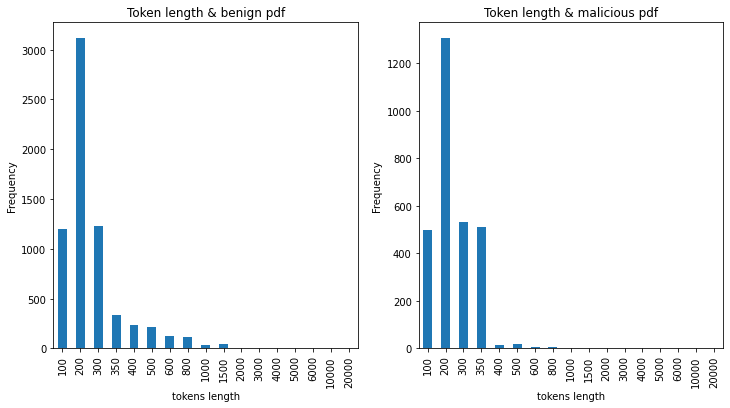

In [28]:
# malicous 와 benign pdf의 토큰개수 비교
# 결과 -> 큰 차이없음

import matplotlib.pyplot as plt

bins = [0,100,200,300,350,400,500,600,800,1000,1500,2000,3000,4000,5000,6000,10000,20000]

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
fig.subplots_adjust(hspace=.5)

df_sub=df[(df['result']==0)]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res1=df1.plot(kind='bar',ax=axes[0])
res1.set_xlabel('tokens length')
res1.set_ylabel('Frequency')
res1.set_title('Token length & benign pdf')


df_sub=df[(df['result']==1)]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res2=df1.plot(kind='bar',ax=axes[1])
res2.set_xlabel('tokens length')
res2.set_ylabel('Frequency')
res2.set_title('Token length & malicious pdf')


In [29]:
# 재작업 피하기 위해 하나 빼두기
df3 = df.copy()



---



# deep learning을 위한 데이터 분할

In [30]:
# 데이터 랜덤화, 테스트용으로 빼놓고위함, train/validation 하기 위함
import numpy as np

df=df.reindex(np.random.permutation(df.index))

In [31]:
# 500개는 테스트용으로 빼고, 9000개를 train/val로 활용

len_unseen=500
df_unseen_test= df.iloc[:len_unseen]
df_model = df.iloc[len_unseen:]

print('total pdf for unseen test data : ', len(df_unseen_test))
print('\t total malicious pdf : ', len(df_unseen_test[df_unseen_test['result']==1]))
print('\t total benign pdf : ', len(df_unseen_test[df_unseen_test['result']==0]))
print()

print('total pdf for model training/validation : ', len(df_model))
print('\t total malicious pdf  : ', len(df_model[df_model['result']==1]))
print('\t total benign pdf  : ', len(df_model[df_model['result']==0]))

total pdf for unseen test data :  500
	 total malicious pdf :  147
	 total benign pdf :  353

total pdf for model training/validation :  9059
	 total malicious pdf  :  2748
	 total benign pdf  :  6311




---



# deep learning

In [32]:
import keras

from keras.layers import Input, Dense
from keras.models import Model,load_model
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint, TensorBoard

In [33]:
import sklearn
from sklearn import metrics
from sklearn import svm
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)



In [47]:
# max number of features
num_max = 4000

In [53]:
def train_tf_idf_model(texts):
    tic = time.process_time()
    
    tok = Tokenizer(num_words=num_max)
    tok.fit_on_texts(texts)
    toc = time.process_time()

    print (" -----total Computation time = " + str((toc - tic)) + " seconds")
    return tok


def prepare_model_input(tfidf_model,dataframe,mode='tfidf'):
    
    tic = time.process_time()
    
    le = LabelEncoder()
    sample_texts = list(dataframe['object'])
    sample_texts = [' '.join(x.split()) for x in sample_texts]
    
    targets=list(dataframe['result'])
    targets = [1. if x== 1 else 0. for x in targets]
    sample_target = le.fit_transform(targets)
    
    if mode=='tfidf':
        sample_texts=tfidf_model.texts_to_matrix(sample_texts,mode='tfidf')
    else:
        sample_texts=tfidf_model.texts_to_matrix(sample_texts)
    
    toc = time.process_time()
    
    print('shape of labels: ', sample_target.shape)
    print('shape of data: ', sample_texts.shape)
    
    print (" -----total Computation time for preparing model data = " + str((toc - tic)) + " seconds")
    
    return sample_texts,sample_target

In [54]:
texts=list(df_model['object'])
tfidf_model=train_tf_idf_model(texts)


 -----total Computation time = 1.7538004549999755 seconds


In [55]:
# prepare model input data
mat_texts,tags=prepare_model_input(tfidf_model,df_model,mode='tfidf')


shape of labels:  (9059,)
shape of data:  (9059, 4000)
 -----total Computation time for preparing model data = 7.448285649000013 seconds


#split train and val

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(mat_texts, tags, test_size=0.15)
print ('train data shape: ', X_train.shape, y_train.shape)
print ('validation data shape :' , X_val.shape, y_val.shape)

train data shape:  (7700, 4000) (7700,)
validation data shape : (1359, 4000) (1359,)


In [57]:
## Define and initialize the network

model_save_path="checkpoints/pdf_model.h5"

In [79]:
def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras.metrics.binary_accuracy])
    print('compile done')
    return model

# def check_model(model,x,y,epochs=2):
#     history=model.fit(x,y,batch_size=32,epochs=epochs,verbose=1,shuffle=True,validation_split=0.2,
#               callbacks=[checkpointer, tensorboard]).history
#     return history

def check_model2(model,x_train,y_train,x_val,y_val,epochs=10):
    history=model.fit(x_train,y_train,batch_size=64,
                      epochs=epochs,verbose=1,
                      shuffle=True,
                      validation_data=(x_val, y_val),
                      callbacks=[checkpointer, tensorboard]).history
    return history

# define checkpointer
checkpointer = ModelCheckpoint(filepath=model_save_path,
                               verbose=1,
                               save_best_only=True)    

# define tensorboard
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

# define the predict function for the deep learning model for later use
def predict(data):
    result=pdf_model_dl.predict(data)
    prediction = [round(x[0]) for x in result]
    return prediction


In [80]:
# get the compiled model
model = get_simple_model()
pdf_model_dl = get_simple_model()

# load history
# history=check_model(m,mat_texts,tags,epochs=10)
history=check_model2(model,X_train,y_train,X_val,y_val,epochs=10)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               2048512   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 2,049,025
Trainable params: 2,049,025
Non-trainable params: 0
_________________________________________________________________
compile done
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               2048512   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________

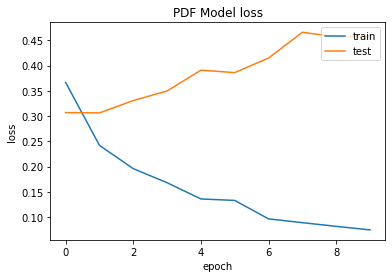

In [60]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('PDF Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');



---



# 모델결과 비교를 위한 머신러닝모델 적용

In [61]:
# 비교1) svm

pdf_model_svm = svm.SVC(verbose=1)
pdf_model_svm.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=1)

In [62]:
# 비교2) randomforest

from sklearn.ensemble import RandomForestClassifier
pdf_model_rf = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=50)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
pdf_model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
# 비교3) Build xgboost also 
import xgboost as xgb

pdf_model_xgboost = xgb.XGBClassifier()
pdf_model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# 모델링 결과비교

In [64]:
sample_texts,sample_target=prepare_model_input(tfidf_model,df_unseen_test,mode='')

shape of labels:  (500,)
shape of data:  (500, 4000)
 -----total Computation time for preparing model data = 0.1342435070000647 seconds


In [85]:
model_dict

{'deep_learning': <function __main__.get_simple_model>,
 'random_forest': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                        oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 'svm': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=1),
 'xgboost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, cols

In [105]:
model_dict={}
model_dict['random_forest']=pdf_model_rf
model_dict['svm']=pdf_model_svm
model_dict['deep_learning']=get_simple_model
model_dict['xgboost']=pdf_model_xgboost


def getResults(model_dict,sample_texts,sample_target):
    '''
    Get results from different models
    '''
    results=[]
    
    results_cm={}
    
    for name,model in model_dict.items():
        print(name)
        tic1 = time.process_time()
        if name in 'deep_learning':
            predicted_sample = predict(sample_texts)
        else:    
            predicted_sample = model.predict(sample_texts)
        toc1 = time.process_time()
        print(predicted_sample)

        cm=sklearn.metrics.confusion_matrix(sample_target, predicted_sample)
        results_cm[name]=cm
        
        total=len(predicted_sample)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        
        time_taken=round(toc1 - tic1,4)
        res=sklearn.metrics.precision_recall_fscore_support(sample_target, predicted_sample)
        res2= sklearn.metrics.accuracy_score(sample_target, predicted_sample)
        results.append([name,np.mean(res2),np.mean(res[0]),np.mean(res[1]),np.mean(res[2]),total,TP,FP,FN,TN,str(time_taken)] )
        
    df_cols=['model','accuracy','precision','recall','f1_score','Total_samples','TP','FP','FN','TN','execution_time']
    result_df=pd.DataFrame(results,columns=df_cols)
    
    return result_df,results_cm

In [106]:
result_df,results_cm= getResults(model_dict,sample_texts,sample_target)
result_df


random_forest
[1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 

,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time,accuracy
0,random_forest,0.869712,0.844405,0.855517,500,332,21,37,110,0.0275,0.884
1,svm,0.901878,0.857152,0.875406,500,341,12,37,110,12.5538,0.902
2,deep_learning,0.495659,0.497697,0.324947,500,44,309,19,128,0.1363,0.344
3,xgboost,0.861195,0.858299,0.859724,500,325,28,30,117,0.0209,0.884


# 결과 시각화

In [99]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['benign', 'malicious'])
    df_cm2.columns=['benign','malicious']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

In [100]:
import seaborn as sns

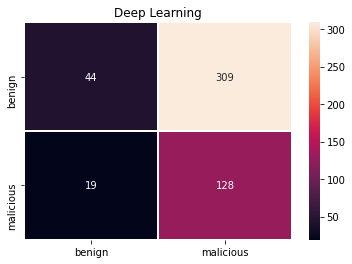

In [101]:
plot_heatmap(results_cm['deep_learning'],'Deep Learning')

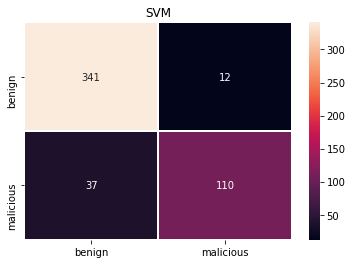

In [102]:
plot_heatmap(results_cm['svm'],'SVM')


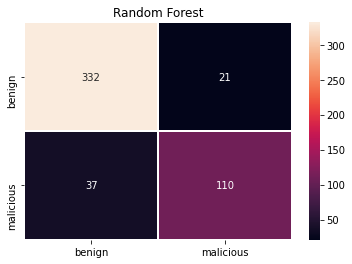

In [103]:
plot_heatmap(results_cm['random_forest'],'Random Forest')


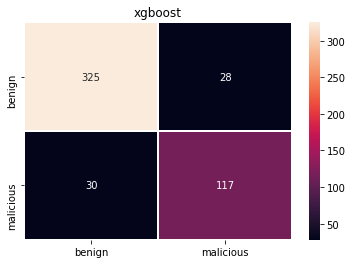

In [104]:
plot_heatmap(results_cm['xgboost'],'xgboost')


---

# 발표구성

#### 1) 시큐레터 소개 (간단하게 핵심만)
#### 2) 프로젝트 주제
#### 3) PDF 구조 설명 (아주 간단하게)
#### 4) 악성PDF란?
#### 5) 가설 : 대부분의 논문이 머신러닝을 이용하였으나, 한계점은 기존의 데이터를 기반으로 하기 때문에 아예 새로운 악성코드 패턴에 취약할수 있다. 그래서 딥러닝 신경망을 활용한 모델을 구축해보고자 한다
#### 6) 전처리 (특히 PDF parser 활용한 object 추출 및 처리과정)
#### 7) 딥러닝 구조 설명
#### 8) 결과를 다른 머신러닝 예시와 함께 비교 (랜포, SVM, XGboost)
#### 9) 방향 : 보안기업 특성상 100% 완벽한 보안체계를 갖추는것이 이상적
#### 머신러닝모델을 통해 정상으로 통과된 파일을 딥러닝을 통해 한번더 필터링 해주는 등의 방식을 통해 놓치게 되는 악성코드가 없도록 단계화

##### (시간된다면 머신러닝+딥러닝 vs 머신러닝 모델링 후 9번방향제시가 맞는지까지 확인)